In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

In [2]:
print(tf.__version__)

2.9.2


## ***Model to predict red wine quality***

**dataset used is takken from kaggle:-** https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

In [3]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Splitting into Input and Output Columns
 

In [4]:
X = df.iloc[:,:-1]
Y = df.iloc[:,11:]

In [5]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


***Converting the values as follows: if quality is greater or equal to 0.5, then 1; otherwise, 0***

In [7]:
Y["quality"] = Y["quality"].apply(lambda x: 1 if x>=7 else 0)

<ipython-input-7-c8c8517f4268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["quality"] = Y["quality"].apply(lambda x: 1 if x>=7 else 0)


In [8]:
Y.head(10)

,quality
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [9]:
Y.quality.unique()

array([0, 1])

*Train Test Split*

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.8, random_state=100)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1279, 11), (320, 11), (1279, 1), (320, 1))

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###***Creating Artificial Neural Network***

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [14]:
classifier = Sequential()

Input Layer

In [15]:
classifier.add(Dense(units=11,activation="relu"))

Hidden Layer 1

In [16]:
classifier.add(Dense(units=7,activation="relu"))
classifier.add(Dropout(0.2))

Hidden Layer 2

In [17]:
classifier.add(Dense(6, "relu"))
classifier.add(Dropout(0.3))

Output Layer

In [18]:
classifier.add(Dense(1,"sigmoid"))

*Using Adam Optimizer with learning rate of 0.01*

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [20]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [22]:
model_history = classifier.fit(X_train,Y_train,batch_size=10, epochs=1000,validation_split=0.33, callbacks=early_stopping)

Epoch 1/1000
86/86 [==============================] - 5s 6ms/step - loss: 0.4822 - accuracy: 0.8259 - val_loss: 0.2897 - val_accuracy: 0.8652
Epoch 2/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.8516 - val_loss: 0.2647 - val_accuracy: 0.8652
Epoch 3/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.8540 - val_loss: 0.2694 - val_accuracy: 0.8794
Epoch 4/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.3066 - accuracy: 0.8633 - val_loss: 0.2506 - val_accuracy: 0.8842
Epoch 5/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8692 - val_loss: 0.2482 - val_accuracy: 0.8842
Epoch 6/1000
86/86 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8633 - val_loss: 0.2410 - val_accuracy: 0.9054
Epoch 7/1000
86/86 [==============================] - 0s 5ms/step - loss: 0.3095 - accuracy: 0.8703 - val_loss: 0.2526 - val_accuracy: 0.8676
Epoch 

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

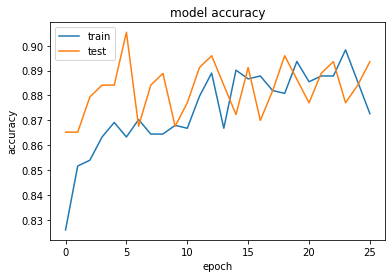

In [24]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc="upper left")
plt.show()

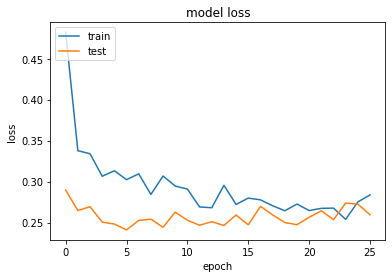

In [25]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc="upper left")
plt.show()

In [26]:
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>=0.5)

10/10 [==============================] - 0s 3ms/step


In [27]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred,Y_test)

**Accuracy**

In [28]:
print(score*100,"%")

90.0 %


*Confusion Matrix*

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[274,  11],
       [ 21,  14]])